By Phyllis Thangaraj for "Medical data and machine learning improve power of
stroke genome-wide association studies" https://www.biorxiv.org/content/10.1101/2020.01.22.915397v1

This notebook makes Latex tables for QTPhenProxy Model performance

In [17]:
import pickle
from collections import defaultdict
dzs=['IscStroke', 'SAHStroke','ICHStroke', 'Stroke', 'NSTEMI', 'STEMI', 'MI', 'MSA', 'MotorNeuron', 'Parkinsons','Parkinsonism','COPD', 'Asthma', 'VascularDementia', 'Alzheimers','AllDementia']
filename=#insert performance metrics for UKBiobank test cases, may depend on whether disease includes self-reported patients in test case or just those with ICD codes
AULR=[]
AURF=[]
AUAB=[]
AUGB=[]
AUEN=[]
AULRerr=[]
AURFerr=[]
AUABerr=[]
AUGBerr=[]
AUENerr=[]
perf_cols_1=[]
perf_cols_2=[]
perf_cols_3=[]
for dz in dzs:
    if dz in ['IscStroke', 'Stroke', 'SAHStroke','ICHStroke', 'MI', 'NSTEMI', 'STEMI']:
        with open(filename+dz+'.p','rb') as pickle_file:
            t=pickle.load(pickle_file,encoding="latin1")
    else:
        with open(filename+dz+'.p','rb') as pickle_file:
            t=pickle.load(pickle_file,encoding="latin1")
        print(t)
    for model in t.keys():
        perf_col_1=[dz,model,format(t[model]['auroc']['mean'],'.3g')+'('+format(t[model]['auroc']['CI'],'.3g')+')',format(t[model]['auprc']['mean'],'.3g')+'('+format(t[model]['auprc']['CI'],'.3g')+')',format(t[model]['max_f1']['mean'],'.3g')+'('+format(t[model]['max_f1']['CI'],'.3g')+')']
        perf_col_2=[dz,model,format(t[model]['prec@50']['mean'],'.3g')+'('+format(t[model]['prec@50']['CI'],'.3g')+')',format(t[model]['prec@100']['mean'],'.3g')+'('+format(t[model]['prec@100']['CI'],'.3g')+')',format(t[model]['prec@500']['mean'],'.3g')+'('+format(t[model]['prec@500']['CI'],'.3g')+')',format(t[model]['prec@Ncases']['mean'],'.3g')+'('+format(t[model]['prec@Ncases']['CI'],'.3g')+')']
        perf_col_3=[dz,model,format(t[model]['sens']['mean'],'.3g')+'('+format(t[model]['sens']['CI'],'.3g')+')',format(t[model]['spec']['mean'],'.3g')+'('+format(t[model]['spec']['CI'],'.3g')+')',format(t[model]['ppv']['mean'],'.3g')+'('+format(t[model]['ppv']['CI'],'.3g')+')',format(t[model]['npv']['mean'],'.3g')+'('+format(t[model]['npv']['CI'],'.3g')+')']
        perf_cols_1.append(perf_col_1)
        perf_cols_2.append(perf_col_2)
        perf_cols_3.append(perf_col_3)
    AULR.append(t['lr']['auroc']['mean'])
    AURF.append(t['rf']['auroc']['mean'])
    AUAB.append(t['ab']['auroc']['mean'])
    AUGB.append(t['gb']['auroc']['mean'])
    AUEN.append(t['en']['auroc']['mean'])
    AULRerr.append(t['lr']['auroc']['CI'])
    AURFerr.append(t['rf']['auroc']['CI'])
    AUABerr.append(t['ab']['auroc']['CI'])
    AUGBerr.append(t['gb']['auroc']['CI'])
    AUENerr.append(t['en']['auroc']['CI'])

defaultdict(<class 'dict'>, {'lr': {'auroc': {'CI': 0.008856130371965592, 'mean': 0.8220118158909405}, 'prec@Ncases': {'CI': 0.0013147077682036544, 'mean': 0.0022222222222222222}, 'auprc': {'CI': 3.585478709324564e-05, 'mean': 0.0012510464095271548}, 'prec@100': {'CI': 0.0010649132922449602, 'mean': 0.0018}, 'prec@500': {'CI': 0.00021298265844899201, 'mean': 0.00036}, 'max_thresh': {'CI': 0.00830955234094769, 'mean': 0.7543865938370318}, 'cross_val': {'CI': 0.008185591138692657, 'mean': 0.819328125}, 'max_f1': {'CI': 5.819147571867908e-05, 'mean': 0.0034687362795874986}, 'sens': {'CI': 0.033494207887603274, 'mean': 0.6525925925925926}, 'prec@50': {'CI': 0.0021298265844899205, 'mean': 0.0036}, 'npv': {'CI': 5.371278464643365e-06, 'mean': 0.9999405882884715}, 'spec': {'CI': 0.0031470306464598235, 'mean': 0.9393780711029805}, 'ppv': {'CI': 5.898660018661597e-06, 'mean': 0.0001122596705947435}}, 'rf': {'auroc': {'CI': 0.0018754971947151436, 'mean': 0.9523914351010174}, 'prec@Ncases': {'CI'

In [65]:
#make latex performance tables
import pandas as pd
columns_1=['disease','model','AUROC','AUPRC','Maximum F1']
columns_2=['disease','model','Prec at 50','Prec at 100','Prec at 500','Prec at N']
columns_3=['disease','model','Sensitivity','Specificity','PPV','NPV']

dz_perf_1=pd.DataFrame(perf_cols_1,columns=columns_1)
dz_perf_2=pd.DataFrame(perf_cols_2,columns=columns_2)
dz_perf_3=pd.DataFrame(perf_cols_3,columns=columns_3)

In [66]:
dz_perf_1.to_latex()

u'\\begin{tabular}{llllll}\n\\toprule\n{} &           disease & model &            AUROC &              AUPRC &         Maximum F1 \\\\\n\\midrule\n0  &         IscStroke &    rf &  0.953(0.000279) &     0.248(0.00201) &     0.326(0.00229) \\\\\n1  &         IscStroke &    ab &   0.95(0.000504) &     0.246(0.00465) &     0.316(0.00335) \\\\\n2  &         IscStroke &    lr &  0.946(0.000409) &      0.239(0.0021) &     0.322(0.00196) \\\\\n3  &         IscStroke &    gb &  0.952(0.000686) &      0.21(0.00479) &     0.294(0.00319) \\\\\n4  &         IscStroke &    en &  0.943(0.000362) &     0.209(0.00193) &     0.295(0.00199) \\\\\n5  &         SAHStroke &    rf &  0.875(0.000746) &     0.144(0.00299) &     0.242(0.00423) \\\\\n6  &         SAHStroke &    ab &   0.859(0.00186) &      0.171(0.0062) &     0.271(0.00807) \\\\\n7  &         SAHStroke &    lr &    0.85(0.00115) &     0.151(0.00419) &     0.291(0.00509) \\\\\n8  &         SAHStroke &    gb &   0.863(0.00149) &     0.113(0.0037

In [67]:
dz_perf_2.to_latex()

u'\\begin{tabular}{lllllll}\n\\toprule\n{} &           disease & model &       Prec at 50 &      Prec at 100 &        Prec at 500 &         Prec at N \\\\\n\\midrule\n0  &         IscStroke &    rf &    0.739(0.0132) &    0.682(0.0105) &     0.544(0.00575) &    0.322(0.00246) \\\\\n1  &         IscStroke &    ab &     0.71(0.0192) &    0.674(0.0154) &      0.527(0.0117) &    0.309(0.00405) \\\\\n2  &         IscStroke &    lr &    0.801(0.0143) &   0.672(0.00997) &      0.483(0.0056) &    0.314(0.00205) \\\\\n3  &         IscStroke &    gb &    0.609(0.0305) &    0.544(0.0246) &      0.425(0.0179) &    0.282(0.00714) \\\\\n4  &         IscStroke &    en &     0.74(0.0141) &    0.63(0.00946) &     0.435(0.00476) &     0.29(0.00197) \\\\\n5  &         SAHStroke &    rf &    0.607(0.0178) &     0.55(0.0106) &     0.308(0.00623) &    0.235(0.00381) \\\\\n6  &         SAHStroke &    ab &    0.627(0.0185) &    0.538(0.0144) &      0.329(0.0102) &    0.266(0.00801) \\\\\n7  &         SAHStrok

In [69]:
dz_perf_3.to_latex()

u'\\begin{tabular}{lllllll}\n\\toprule\n{} &           disease & model &      Sensitivity &      Specificity &                 PPV &              NPV \\\\\n\\midrule\n0  &         IscStroke &    rf &   0.347(0.00483) &  0.996(0.000133) &   0.00185(2.58e-05) &  0.997(2.52e-05) \\\\\n1  &         IscStroke &    ab &   0.369(0.00744) &  0.995(0.000256) &   0.00196(3.99e-05) &  0.997(3.86e-05) \\\\\n2  &         IscStroke &    lr &   0.362(0.00528) &  0.995(0.000127) &   0.00192(2.82e-05) &  0.997(2.76e-05) \\\\\n3  &         IscStroke &    gb &   0.368(0.00868) &  0.994(0.000354) &   0.00196(4.67e-05) &   0.997(4.5e-05) \\\\\n4  &         IscStroke &    en &   0.332(0.00624) &  0.995(0.000195) &   0.00177(3.35e-05) &  0.996(3.24e-05) \\\\\n5  &         SAHStroke &    rf &   0.215(0.00503) &  0.999(5.47e-05) &  0.000354(8.28e-06) &  0.999(8.21e-06) \\\\\n6  &         SAHStroke &    ab &   0.272(0.00924) &  0.999(7.14e-05) &  0.000447(1.52e-05) &  0.999(1.51e-05) \\\\\n7  &         SAHStrok

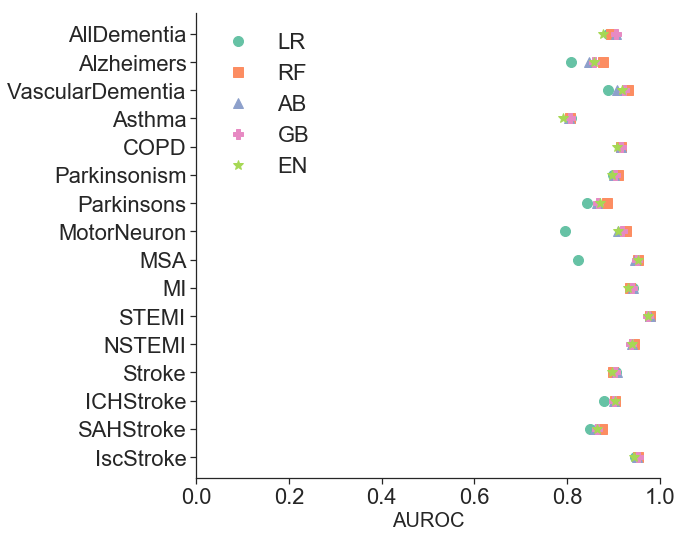

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import seaborn as sns
color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
Label=dzs
markers=['o','s','^','P','*','x','d','+','8','v','p','<','>','h','1','D']
sns.set(style='ticks', font_scale=2)
fig, ax = plt.subplots(figsize=(10,8))


rec1=ax.errorbar(x=AULR, y=Label, xerr=AULRerr,fmt='o',markersize=10,color=color[0],marker=markers[0])
rec2=ax.errorbar(x=AURF, y=Label, xerr=AURFerr,fmt='o',markersize=10,color=color[1],marker=markers[1])
rec3=ax.errorbar(x=AUAB, y=Label,xerr=AUABerr,fmt='o',markersize=10,color=color[2],marker=markers[2])
rec4=ax.errorbar(x=AUGB, y=Label,xerr=AUGBerr,fmt='o',markersize=10,color=color[3],marker=markers[3])
rec5=ax.errorbar(x=AUEN, y=Label,xerr=AUENerr,fmt='o',markersize=10,color=color[4],marker=markers[4])
ax.set_xlabel('AUROC',fontsize=20)
ax.legend((rec1[0], rec2[0],rec3[0],rec4[0],rec5[0]), ('LR', 'RF', 'AB','GB','EN'),loc='upper left',frameon=False,edgecolor='white')
sns.despine()
plt.xlim(0,1)
plt.tight_layout()
filename=#insert filename to save performance figure
plt.savefig(filename,format='eps', dpi=1000)
plt.show()

In [26]:
models=['lr','en','rf','ab','gb']
for model in models:
    print model,format(t[model]['sens']['mean'],'.3g')+'('+format(t[model]['sens']['mean']-t[model]['sens']['CI'],'.3g')+','+format(t[model]['sens']['mean']+t[model]['sens']['CI'],'.3g')+')',format(t[model]['spec']['mean'],'.3g')+'('+format(t[model]['spec']['mean']-t[model]['spec']['CI'],'.3g')+','+format(t[model]['spec']['mean']+t[model]['spec']['CI'],'.3g')+')',format(t[model]['ppv']['mean'],'.3g')+'('+format(t[model]['ppv']['mean']-t[model]['ppv']['CI'],'.3g')+','+format(t[model]['ppv']['mean']+t[model]['ppv']['CI'],'.3g')+')',format(t[model]['npv']['mean'],'.3g')+'('+format(t[model]['npv']['mean']-t[model]['npv']['CI'],'.3g')+','+format(t[model]['npv']['mean']+t[model]['npv']['CI'],'.3g')+')'


lr 0.363(0.357,0.368) 0.995(0.995,0.995) 0.00193(0.0019,0.00196) 0.997(0.997,0.997)
en 0.333(0.327,0.34) 0.995(0.995,0.995) 0.00177(0.00174,0.00181) 0.996(0.996,0.996)
rf 0.347(0.341,0.353) 0.996(0.996,0.996) 0.00184(0.00181,0.00187) 0.997(0.997,0.997)
ab 0.372(0.365,0.378) 0.995(0.995,0.995) 0.00198(0.00194,0.00201) 0.997(0.997,0.997)
gb 0.358(0.353,0.364) 0.994(0.994,0.995) 0.00191(0.00188,0.00194) 0.997(0.997,0.997)


In [33]:
for model in models:
    print t[model]['prec@500']['mean']

0.47956000000000004
0.43268000000000006
0.54932
0.5209600000000001
0.4405599999999999


In [14]:
#train on HALF ICDs, number trained/number total patients available for testing
prec_rand={}
prec_rand['Parkinsonism']=1721./499130
prec_rand['Parkinsons']=693/501159.
prec_rand['MSA']=81/502383.
prec_rand['PSP']=11/502523.
prec_rand['MotorNeuron']=127/502289.
prec_rand['COPD']= 6151/490246.
prec_rand['Asthma']=16262/470032.
prec_rand['AllDementia']=165/499245.
prec_rand['VascularDementia']=137/502271.
prec_rand['Alzheimers']=257/502029.
prec_rand['FTDementia']=27/502491.

In [15]:
import pickle
dz_models={}
dzs=prec_rand.keys()
for dz in dzs:
    filename= #filename stub for "perf_metrics_onlyicdtestcases_wd"
    with open(filename+dz+'.p','rb') as pickle_file:
        t=pickle.load(pickle_file)
    dz_models[dz]=t

In [56]:
for model in models:
    dz_models['SAHStroke'][model]['prec@Ncases']=dz_models['SAHStroke'][model]['prec@329']

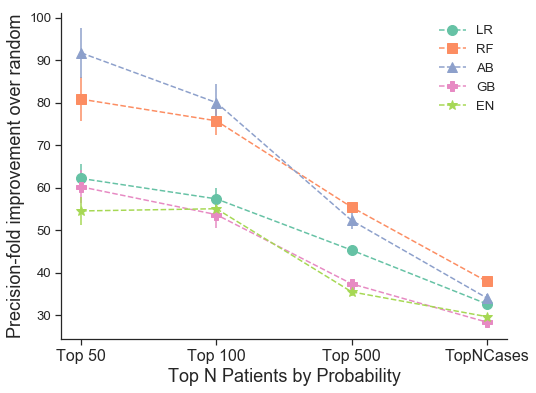

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import seaborn as sns
import csv
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
Label=['Top 50','Top 100','Top 500','Top 870']
models=['lr','en','rf','ab','gb']
dz='Parkinsonism'
P={}
for model in models:
    P[model]=[dz_models[dz][model]['prec@50']['mean']/prec_rand[dz],dz_models[dz][model]['prec@100']['mean']/prec_rand[dz],dz_models[dz][model]['prec@500']['mean']/prec_rand[dz],dz_models[dz][model]['prec@Ncases']['mean']/prec_rand[dz]]

Perr={}
for model in models:
    Perr[model]=np.array([((dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz])]).T
markers=['o','s','^','P','*','x','d','+','8','v','p','<','>','h','1','D']
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,6))
rec1=ax.errorbar(y=P['lr'], x=Label, yerr=Perr['lr'],fmt='o--',markersize=10,color=color[0],marker=markers[0])
rec2=ax.errorbar(y=P['rf'], x=Label, yerr=Perr['rf'],fmt='o--',markersize=10,color=color[1],marker=markers[1])
rec3=ax.errorbar(y=P['ab'], x=Label,yerr=Perr['ab'],fmt='o--',markersize=10,color=color[2],marker=markers[2])
rec4=ax.errorbar(y=P['gb'], x=Label,yerr=Perr['gb'],fmt='o--',markersize=10,color=color[3],marker=markers[3])
rec5=ax.errorbar(y=P['en'], x=Label,yerr=Perr['en'],fmt='o--',markersize=10,color=color[4],marker=markers[4])
ax.set_xticklabels(('Top 50','Top 100','Top 500','TopNCases'),fontsize=16)
ax.set_ylabel('Precision-fold improvement over random',fontsize=18)
ax.set_xlabel('Top N Patients by Probability',fontsize=18)
ax.legend((rec1[0], rec2[0],rec3[0],rec4[0],rec5[0]), ('LR', 'RF', 'AB','GB','EN'),loc='upper right',frameon=False,edgecolor='white')
sns.despine()
filename=#insert filename stub for Precision fold figure
plt.savefig(filname+dz+'.eps',bbox_inches='tight',format='eps', dpi=1000)
plt.show()

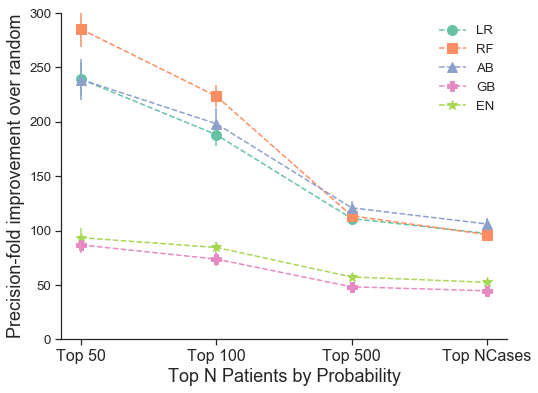

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import seaborn as sns
import csv
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
Label=['Top 50','Top 100','Top 500','Top 870']
models=['lr','en','rf','ab','gb']
dz='Parkinsons'
P={}
for model in models:
    P[model]=[dz_models[dz][model]['prec@50']['mean']/prec_rand[dz],dz_models[dz][model]['prec@100']['mean']/prec_rand[dz],dz_models[dz][model]['prec@500']['mean']/prec_rand[dz],dz_models[dz][model]['prec@Ncases']['mean']/prec_rand[dz]]
Perr={}
for model in models:
    Perr[model]=np.array([((dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz])]).T
markers=['o','s','^','P','*','x','d','+','8','v','p','<','>','h','1','D']
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,6))
rec1=ax.errorbar(y=P['lr'], x=Label, yerr=Perr['lr'],fmt='o--',markersize=10,color=color[0],marker=markers[0])
rec2=ax.errorbar(y=P['rf'], x=Label, yerr=Perr['rf'],fmt='o--',markersize=10,color=color[1],marker=markers[1])
rec3=ax.errorbar(y=P['ab'], x=Label,yerr=Perr['ab'],fmt='o--',markersize=10,color=color[2],marker=markers[2])
rec5=ax.errorbar(y=P['en'], x=Label,yerr=Perr['en'],fmt='o--',markersize=10,color=color[4],marker=markers[4])
rec4=ax.errorbar(y=P['gb'], x=Label,yerr=Perr['gb'],fmt='o--',markersize=10,color=color[3],marker=markers[3])
ax.set_xticklabels(('Top 50','Top 100','Top 500','Top NCases'),fontsize=16)
ax.set_ylabel('Precision-fold improvement over random',fontsize=18)
ax.set_xlabel('Top N Patients by Probability',fontsize=18)
ax.legend((rec1[0], rec2[0],rec3[0],rec4[0],rec5[0]), ('LR', 'RF', 'AB','GB','EN'),loc='upper right',frameon=False,edgecolor='white')
plt.ylim(0,300)
sns.despine()
filename=#insert filename stub for Precision fold figure
plt.savefig(filename+dz+'.eps',bbox_inches='tight',format='eps', dpi=1000)
plt.show()

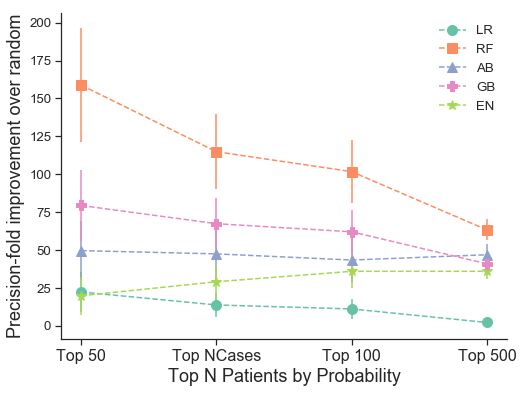

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import seaborn as sns
import csv
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
Label=['Top 50','Top 100','Top 500','Top 870']
models=['lr','en','rf','ab','gb']
dz='MSA'
P={}
for model in models:
    P[model]=[dz_models[dz][model]['prec@50']['mean']/prec_rand[dz],dz_models[dz][model]['prec@Ncases']['mean']/prec_rand[dz],dz_models[dz][model]['prec@100']['mean']/prec_rand[dz],dz_models[dz][model]['prec@500']['mean']/prec_rand[dz]]
Perr={}
for model in models:
    Perr[model]=np.array([((dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz]),((dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz])]).T
markers=['o','s','^','P','*','x','d','+','8','v','p','<','>','h','1','D']
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,6))
rec1=ax.errorbar(y=P['lr'], x=Label, yerr=Perr['lr'],fmt='o--',markersize=10,color=color[0],marker=markers[0])
rec2=ax.errorbar(y=P['rf'], x=Label, yerr=Perr['rf'],fmt='o--',markersize=10,color=color[1],marker=markers[1])
rec3=ax.errorbar(y=P['ab'], x=Label,yerr=Perr['ab'],fmt='o--',markersize=10,color=color[2],marker=markers[2])
rec5=ax.errorbar(y=P['en'], x=Label,yerr=Perr['en'],fmt='o--',markersize=10,color=color[4],marker=markers[4])
rec4=ax.errorbar(y=P['gb'], x=Label,yerr=Perr['gb'],fmt='o--',markersize=10,color=color[3],marker=markers[3])
ax.set_xticklabels(('Top 50','Top NCases','Top 100','Top 500'),fontsize=16)
ax.set_ylabel('Precision-fold improvement over random',fontsize=18)
ax.set_xlabel('Top N Patients by Probability',fontsize=18)
ax.legend((rec1[0], rec2[0],rec3[0],rec4[0],rec5[0]), ('LR', 'RF', 'AB','GB','EN'),loc='upper right',frameon=False,edgecolor='white')
sns.despine()
filename=#insert filename stub for Precision fold figure
plt.savefig(filename+dz+'.eps',bbox_inches='tight',format='eps', dpi=10)
plt.show()

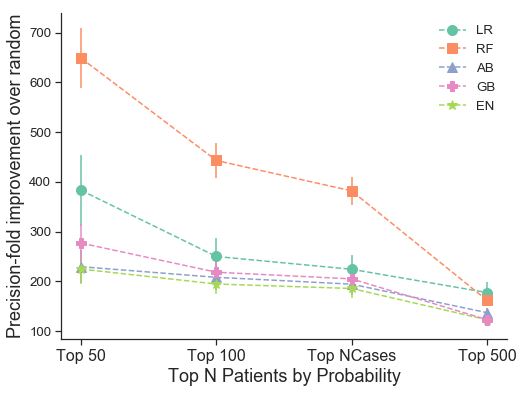

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import seaborn as sns
import csv
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
Label=['Top 50','Top 100','Top 500','Top 870']
models=['lr','en','rf','ab','gb']
dz='MotorNeuron'
P={}
for model in models:
    P[model]=[dz_models[dz][model]['prec@50']['mean']/prec_rand[dz],dz_models[dz][model]['prec@100']['mean']/prec_rand[dz],dz_models[dz][model]['prec@Ncases']['mean']/prec_rand[dz],dz_models[dz][model]['prec@500']['mean']/prec_rand[dz]]
Perr={}
for model in models:
    Perr[model]=np.array([((dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz]),((dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz])]).T
markers=['o','s','^','P','*','x','d','+','8','v','p','<','>','h','1','D']
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,6))
rec1=ax.errorbar(y=P['lr'], x=Label, yerr=Perr['lr'],fmt='o--',markersize=10,color=color[0],marker=markers[0])
rec2=ax.errorbar(y=P['rf'], x=Label, yerr=Perr['rf'],fmt='o--',markersize=10,color=color[1],marker=markers[1])
rec3=ax.errorbar(y=P['ab'], x=Label,yerr=Perr['ab'],fmt='o--',markersize=10,color=color[2],marker=markers[2])
rec5=ax.errorbar(y=P['en'], x=Label,yerr=Perr['en'],fmt='o--',markersize=10,color=color[4],marker=markers[4])
rec4=ax.errorbar(y=P['gb'], x=Label,yerr=Perr['gb'],fmt='o--',markersize=10,color=color[3],marker=markers[3])
ax.set_xticklabels(('Top 50','Top 100','Top NCases','Top 500'),fontsize=16)
ax.set_ylabel('Precision-fold improvement over random',fontsize=18)
ax.set_xlabel('Top N Patients by Probability',fontsize=18)
ax.legend((rec1[0], rec2[0],rec3[0],rec4[0],rec5[0]), ('LR', 'RF', 'AB','GB','EN'),loc='upper right',frameon=False,edgecolor='white')
sns.despine()
filename=#insert filename stub for Precision fold figure
plt.savefig(filename+dz+'.eps',bbox_inches='tight',format='eps', dpi=1000)
plt.show()

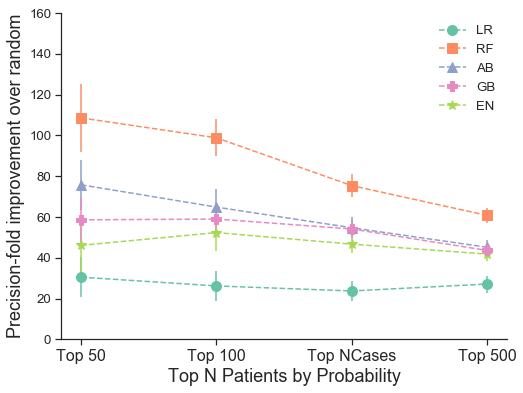

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import seaborn as sns
import csv
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
Label=['Top 50','Top 100','Top 500','Top 870']
models=['lr','en','rf','ab','gb']
dz='Alzheimers'
P={}
for model in models:
    P[model]=[dz_models[dz][model]['prec@50']['mean']/prec_rand[dz],dz_models[dz][model]['prec@100']['mean']/prec_rand[dz],dz_models[dz][model]['prec@Ncases']['mean']/prec_rand[dz],dz_models[dz][model]['prec@500']['mean']/prec_rand[dz]]
Perr={}
for model in models:
    Perr[model]=np.array([((dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz]),((dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz])]).T
markers=['o','s','^','P','*','x','d','+','8','v','p','<','>','h','1','D']
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,6))
rec1=ax.errorbar(y=P['lr'], x=Label, yerr=Perr['lr'],fmt='o--',markersize=10,color=color[0],marker=markers[0])
rec2=ax.errorbar(y=P['rf'], x=Label, yerr=Perr['rf'],fmt='o--',markersize=10,color=color[1],marker=markers[1])
rec3=ax.errorbar(y=P['ab'], x=Label,yerr=Perr['ab'],fmt='o--',markersize=10,color=color[2],marker=markers[2])
rec5=ax.errorbar(y=P['en'], x=Label,yerr=Perr['en'],fmt='o--',markersize=10,color=color[4],marker=markers[4])
rec4=ax.errorbar(y=P['gb'], x=Label,yerr=Perr['gb'],fmt='o--',markersize=10,color=color[3],marker=markers[3])
ax.set_xticklabels(('Top 50','Top 100','Top NCases','Top 500'),fontsize=16)
ax.set_ylabel('Precision-fold improvement over random',fontsize=18)
ax.set_xlabel('Top N Patients by Probability',fontsize=18)
ax.legend((rec1[0], rec2[0],rec3[0],rec4[0],rec5[0]), ('LR', 'RF', 'AB','GB','EN'),loc='upper right',frameon=False,edgecolor='white')
sns.despine()
plt.ylim(0,160)
filename=#insert filename stub for Precision fold figure
plt.savefig(fielname+dz+'.eps',bbox_inches='tight',format='eps', dpi=1000)
plt.show()

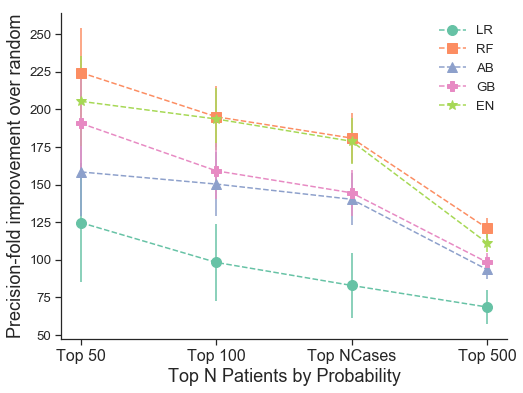

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import seaborn as sns
import csv
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
Label=['Top 50','Top 100','Top 500','Top 870']
models=['lr','en','rf','ab','gb']
dz='VascularDementia'
P={}
for model in models:
    P[model]=[dz_models[dz][model]['prec@50']['mean']/prec_rand[dz],dz_models[dz][model]['prec@100']['mean']/prec_rand[dz],dz_models[dz][model]['prec@Ncases']['mean']/prec_rand[dz],dz_models[dz][model]['prec@500']['mean']/prec_rand[dz]]
Perr={}
for model in models:
    Perr[model]=np.array([((dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz]),((dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz])]).T

markers=['o','s','^','P','*','x','d','+','8','v','p','<','>','h','1','D']
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,6))
rec1=ax.errorbar(y=P['lr'], x=Label, yerr=Perr['lr'],fmt='o--',markersize=10,color=color[0],marker=markers[0])
rec2=ax.errorbar(y=P['rf'], x=Label, yerr=Perr['rf'],fmt='o--',markersize=10,color=color[1],marker=markers[1])
rec3=ax.errorbar(y=P['ab'], x=Label,yerr=Perr['ab'],fmt='o--',markersize=10,color=color[2],marker=markers[2])
rec5=ax.errorbar(y=P['en'], x=Label,yerr=Perr['en'],fmt='o--',markersize=10,color=color[4],marker=markers[4])
rec4=ax.errorbar(y=P['gb'], x=Label,yerr=Perr['gb'],fmt='o--',markersize=10,color=color[3],marker=markers[3])
ax.set_xticklabels(('Top 50','Top 100','Top NCases','Top 500'),fontsize=16)
ax.set_ylabel('Precision-fold improvement over random',fontsize=18)
ax.set_xlabel('Top N Patients by Probability',fontsize=18)
ax.legend((rec1[0], rec2[0],rec3[0],rec4[0],rec5[0]), ('LR', 'RF', 'AB','GB','EN'),loc='upper right',frameon=False,edgecolor='white')
sns.despine()
filename=#insert filename stub for Precision fold figure
plt.savefig(filename+dz+'.eps',bbox_inches='tight',format='eps', dpi=1000)
plt.show()

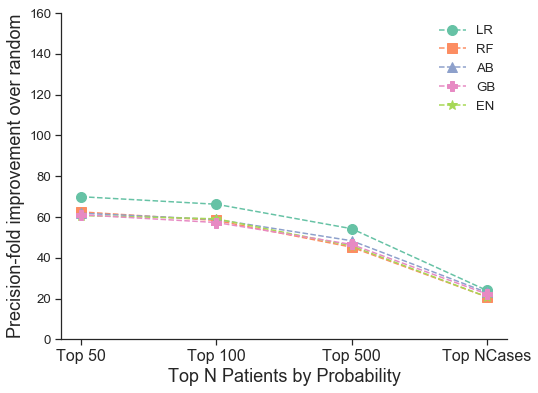

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import seaborn as sns
import csv
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
Label=['Top 50','Top 100','Top 500','Top 870']
models=['lr','en','rf','ab','gb']
dz='COPD'
P={}
for model in models:
    P[model]=[dz_models[dz][model]['prec@50']['mean']/prec_rand[dz],dz_models[dz][model]['prec@100']['mean']/prec_rand[dz],dz_models[dz][model]['prec@500']['mean']/prec_rand[dz],dz_models[dz][model]['prec@Ncases']['mean']/prec_rand[dz]]

Perr={}
for model in models:
    Perr[model]=np.array([((dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz])]).T

markers=['o','s','^','P','*','x','d','+','8','v','p','<','>','h','1','D']
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,6))
rec1=ax.errorbar(y=P['lr'], x=Label, yerr=Perr['lr'],fmt='o--',markersize=10,color=color[0],marker=markers[0])
rec2=ax.errorbar(y=P['rf'], x=Label, yerr=Perr['rf'],fmt='o--',markersize=10,color=color[1],marker=markers[1])
rec3=ax.errorbar(y=P['ab'], x=Label,yerr=Perr['ab'],fmt='o--',markersize=10,color=color[2],marker=markers[2])
rec5=ax.errorbar(y=P['en'], x=Label,yerr=Perr['en'],fmt='o--',markersize=10,color=color[4],marker=markers[4])
rec4=ax.errorbar(y=P['gb'], x=Label,yerr=Perr['gb'],fmt='o--',markersize=10,color=color[3],marker=markers[3])
ax.set_xticklabels(('Top 50','Top 100','Top 500','Top NCases'),fontsize=16)
ax.set_ylabel('Precision-fold improvement over random',fontsize=18)
ax.set_xlabel('Top N Patients by Probability',fontsize=18)
ax.legend((rec1[0], rec2[0],rec3[0],rec4[0],rec5[0]), ('LR', 'RF', 'AB','GB','EN'),loc='upper right',frameon=False,edgecolor='white')
sns.despine()
plt.ylim(0,160)
filename=#insert filename stub for Precision fold figure
plt.savefig(filename+dz+'.eps',bbox_inches='tight',format='eps', dpi=1000)
plt.show()

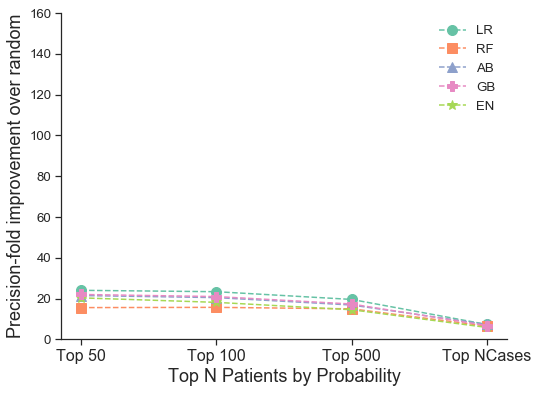

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import seaborn as sns
import csv
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
Label=['Top 50','Top 100','Top 500','Top 870']
# PLR=[.460,.391,.229,.193]
# PEN=[.280,.227,.154,.129]
# PRF=[.374,.337,.220,.185]
# PAB=[.514,.483,.369,.314]
# PGB=[.261,.239,.181,.154]
models=['lr','en','rf','ab','gb']
dz='Asthma'
P={}
for model in models:
    P[model]=[dz_models[dz][model]['prec@50']['mean']/prec_rand[dz],dz_models[dz][model]['prec@100']['mean']/prec_rand[dz],dz_models[dz][model]['prec@500']['mean']/prec_rand[dz],dz_models[dz][model]['prec@Ncases']['mean']/prec_rand[dz]]

Perr={}
for model in models:
    Perr[model]=np.array([((dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz])]).T

markers=['o','s','^','P','*','x','d','+','8','v','p','<','>','h','1','D']
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,6))
rec1=ax.errorbar(y=P['lr'], x=Label, yerr=Perr['lr'],fmt='o--',markersize=10,color=color[0],marker=markers[0])
rec2=ax.errorbar(y=P['rf'], x=Label, yerr=Perr['rf'],fmt='o--',markersize=10,color=color[1],marker=markers[1])
rec3=ax.errorbar(y=P['ab'], x=Label,yerr=Perr['ab'],fmt='o--',markersize=10,color=color[2],marker=markers[2])
rec5=ax.errorbar(y=P['en'], x=Label,yerr=Perr['en'],fmt='o--',markersize=10,color=color[4],marker=markers[4])
rec4=ax.errorbar(y=P['gb'], x=Label,yerr=Perr['gb'],fmt='o--',markersize=10,color=color[3],marker=markers[3])
ax.set_xticklabels(('Top 50','Top 100','Top 500','Top NCases'),fontsize=16)
ax.set_ylabel('Precision-fold improvement over random',fontsize=18)
ax.set_xlabel('Top N Patients by Probability',fontsize=18)
ax.legend((rec1[0], rec2[0],rec3[0],rec4[0],rec5[0]), ('LR', 'RF', 'AB','GB','EN'),loc='upper right',frameon=False,edgecolor='white')
sns.despine()
plt.ylim(0,160)
filename=#insert filename stub for Precision fold figure
plt.savefig(filename+dz+'.eps',bbox_inches='tight',format='eps', dpi=1000)
plt.show()

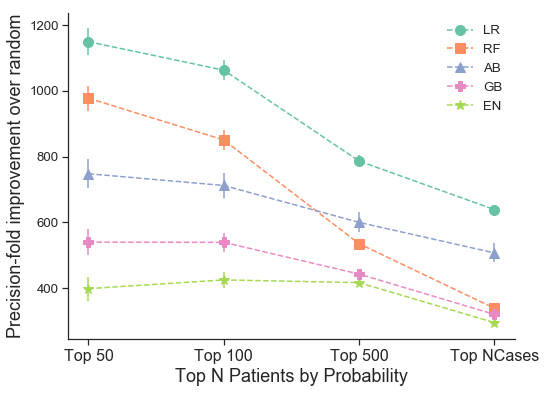

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import seaborn as sns
import csv
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
Label=['Top 50','Top 100','Top 500','Top 870']
models=['lr','en','rf','ab','gb']
dz='AllDementia'
P={}
for model in models:
    P[model]=[dz_models[dz][model]['prec@50']['mean']/prec_rand[dz],dz_models[dz][model]['prec@100']['mean']/prec_rand[dz],dz_models[dz][model]['prec@500']['mean']/prec_rand[dz],dz_models[dz][model]['prec@Ncases']['mean']/prec_rand[dz]]

Perr={}
for model in models:
    Perr[model]=np.array([((dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@50']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@100']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@500']['CI'])/prec_rand[dz]), ((dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz],(dz_models[dz][model]['prec@Ncases']['CI'])/prec_rand[dz])]).T
markers=['o','s','^','P','*','x','d','+','8','v','p','<','>','h','1','D']
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,6))
rec1=ax.errorbar(y=P['lr'], x=Label, yerr=Perr['lr'],fmt='o--',markersize=10,color=color[0],marker=markers[0])
rec2=ax.errorbar(y=P['rf'], x=Label, yerr=Perr['rf'],fmt='o--',markersize=10,color=color[1],marker=markers[1])
rec3=ax.errorbar(y=P['ab'], x=Label,yerr=Perr['ab'],fmt='o--',markersize=10,color=color[2],marker=markers[2])
rec5=ax.errorbar(y=P['en'], x=Label,yerr=Perr['en'],fmt='o--',markersize=10,color=color[4],marker=markers[4])
rec4=ax.errorbar(y=P['gb'], x=Label,yerr=Perr['gb'],fmt='o--',markersize=10,color=color[3],marker=markers[3])
ax.set_xticklabels(('Top 50','Top 100','Top 500','Top NCases'),fontsize=16)
ax.set_ylabel('Precision-fold improvement over random',fontsize=18)
ax.set_xlabel('Top N Patients by Probability',fontsize=18)
ax.legend((rec1[0], rec2[0],rec3[0],rec4[0],rec5[0]), ('LR', 'RF', 'AB','GB','EN'),loc='upper right',frameon=False,edgecolor='white')
sns.despine()
filename=#insert filename stub for Precision fold figure
plt.savefig(filename+dz+'.eps',bbox_inches='tight',format='eps', dpi=1000)
plt.show()